In [1]:
# https://github.com/youngmihuang/lyrics_application
# https://pypi.org/project/GoogleNews/

from GoogleNews import GoogleNews

import requests 
from bs4 import BeautifulSoup
import pandas as pd

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()


x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get__links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
#     print(n+1)
    print(result[n])
    print(links[n])
   

df = pd.DataFrame(
{
    '標題': result,
    '連結': links
})
 
df


請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:美國選舉

美國大選激戰中綠委分析：現在食不知味的可能是習近平..... | 政治
https://newtalk.tw/news/view/2020-11-04/489304
美國大選今天難有結果賓州等4搖擺州郵寄選票將是關鍵【不斷更新】 | 國際| 重點新聞
https://www.cna.com.tw/news/firstnews/202011045008.aspx
【即時開票不斷更新】2020美國大選！選戰陷膠著 拜登以224:213暫領先川普
https://udn.com/news/story/121687/4968252
【美國選舉制度】認識選舉人票旨在平衝各州利益而非漏洞 ...
https://inews.hket.com/article/2758815/%E3%80%90%E7%BE%8E%E5%9C%8B%E9%81%B8%E8%88%89%E5%88%B6%E5%BA%A6%E3%80%91%E8%AA%8D%E8%AD%98%E9%81%B8%E8%88%89%E4%BA%BA%E7%A5%A8%20%E6%97%A8%E5%9C%A8%E5%B9%B3%E8%A1%9D%E5%90%84%E5%B7%9E%E5%88%A9%E7%9B%8A%20%E8%80%8C%E9%9D%9E%E6%BC%8F%E6%B4%9E
美國「選舉人票制」開票超無聊？台人一面倒：怎麼會不嗨
https://tw.news.yahoo.com/%E7%BE%8E%E5%9C%8B-%E9%81%B8%E8%88%89%E4%BA%BA%E5%9C%98%E5%88%B6-%E9%96%8B%E7%A5%A8%E8%B6%85%E7%84%A1%E8%81%8A-%E5%8F%B0%E4%BA%BA-%E9%9D%A2%E5%80%92-060938947.html
前美國安局法務長：美國選舉大贏家出爐 不實資訊大贏
https://udn.com/news/story/121777/4988688?from=udn-catelistnews_ch2
專家：美國總統選舉結果 對巴西貿易影響不大
https://money.udn.com/money/story/5599/4987308
美國總統選舉憂暴動 特朗普派兵

,標題,連結
0,美國大選激戰中綠委分析：現在食不知味的可能是習近平..... | 政治,https://newtalk.tw/news/view/2020-11-04/489304
1,美國大選今天難有結果賓州等4搖擺州郵寄選票將是關鍵【不斷更新】 | 國際| 重點新聞,https://www.cna.com.tw/news/firstnews/20201104...
2,【即時開票不斷更新】2020美國大選！選戰陷膠著 拜登以224:213暫領先川普,https://udn.com/news/story/121687/4968252
3,【美國選舉制度】認識選舉人票旨在平衝各州利益而非漏洞 ...,https://inews.hket.com/article/2758815/%E3%80%...
4,美國「選舉人票制」開票超無聊？台人一面倒：怎麼會不嗨,https://tw.news.yahoo.com/%E7%BE%8E%E5%9C%8B-%...
5,前美國安局法務長：美國選舉大贏家出爐 不實資訊大贏,https://udn.com/news/story/121777/4988688?from...
6,專家：美國總統選舉結果 對巴西貿易影響不大,https://money.udn.com/money/story/5599/4987308
7,美國總統選舉憂暴動 特朗普派兵應對成話題？,https://www.rfi.fr/cn/%E6%94%BF%E6%B2%BB/20201...
8,〈紐約匯市〉美國大選日風險胃納增 美元回軟、商品貨幣漲,https://news.cnyes.com/news/id/4538127
9,美國大選登場逾一億選民提前投票| 美國總統大選| 國際,https://money.udn.com/money/story/10511/4987002


In [5]:

url = df['連結'][0]
print(url)


user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}


r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html')


articleContent = soup.find_all('p')
# articleContent

article = []
for p in articleContent:
    article.append(p.text)


articleAll = '\n'.join(article)
# print(articleAll)

# 分段用

https://newtalk.tw/news/view/2020-11-04/489304


In [7]:

import jieba
jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

搜索引擎模式: 2020/ 美國/ 總統/ 大選/ 於/ 美國/ 時間/ 11/ 月/ 3/ 日/ 投票/ 共和/ 共和黨/ 的/ 川普/ Donald/  / Trump/ 對決/ 民主/ 民主黨/ 的/ 拜登/ Joe/  / Biden/ 目前/ 仍/ 在/ 開票/ 中/ 各界/ 矚目/ 對/ 此/ 民進/ 民進黨/ 立委/ 莊瑞雄/ 今天/ (/ 4/ 日/ )/ 受訪/ 時/ 表示/ 相信/ 在/ 美國/ 選舉/ 後/ 台美/ 進展/ 仍/ 會/ 穩健/ 發展/ 綠委/ 王定宇/ 則/ 說/  / 不論/ 是/ 誰/ 勝出/ 都/ 是/ 民主/ 勝利/ 現在/ 不知/ 食不知味/ 可能/ 是/ 習近/ 近平/ 習近平/ 不/ 是/ 台灣/ 這邊/ 
/ 美國/ 總統/ 大選/ 開票/ 雙方/ 選情/ 膠著/ 不過/ 川普/ 在/ 關鍵/ 搖擺/ 州/ 的/ 選情/ 樂觀/ 川普/ 並/ 於/ 當地/ 時間/ 凌晨/ 2/ 點多/ 現身/ 白宮/ 發表/ 談話/ 有/ 自信/ 地/ 說/ 搖擺/ 州/ 領先/ 全贏/ 了/ 可以/ 準備/ 慶祝/ 了/ 
/ 對於/ 美國/ 大選/ 結果/ 莊瑞雄/ 受訪/ 時/ 說/ 不論/ 是/ 川普/ 還是/ 拜登/ 當選/ 台灣/ 維繫/ 台美/ 關係/ 方向/ 都/ 不會/ 改變/ 若是/ 川普/ 連任/ 台美/ 關係/ 變數/ 降低/ 比較/ 有/ 預測/ 預測性/ 若是/ 拜登/ 當選/ 就/ 有/ 變數/ 台灣/ 與/ 美國/ 團隊/ 就/ 要/ 重新/ 交往/ 畢竟/ 新/ 的/ 團隊/ 有/ 新/ 的/ 思維/ 雖然/ 反中/ 氣氛/ 不/ 容易/ 改變/ 但/ 未來/ 軍購/ 要/ 考量/ 到質/ 或/ 量/ 是否/ 還是/ 會/ 力挺/ 台灣/ 這/ 些/ 都/ 值得/ 觀察/ 
/ 莊瑞雄/ 提及/ 在/ 蔡/ 總統/ 領導/ 之下/ 台灣/ 穩健/ 發展/ 兩岸/ 關係/ 升溫/ 有/ 哪/ 件事/ 是/ 英文/ 蔡英文/ 升高/ 台灣/ 去/ 挑釁/ 的/ 美國/ 選舉/ 之後/ 相信/ 台美/ 關係/ 進展/ 會/ 持續/ 穩健/ 兩岸/ 關係/ 確實/ 要/ 找到/ 突破/ 突破點/ 
/ 至於/ 美國/ 選舉/ 後/ 共軍/ 擾台/ 的/ 動作/ 是否/ 降低/ 莊瑞雄/ 認為/ 兩岸/ 

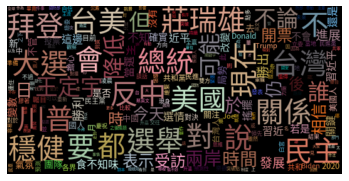

<Figure size 8000x4000 with 0 Axes>

In [8]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude



with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    

Sentence = jieba.cut_for_search(d)    


terms = {}
for sentence in Sentence :
    if sentence in stops:
        continue
    
    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1  
        
        
# dicition = Counter(terms)
# print(Counter(terms))








        
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular





icon = "color"
icon_path = "%s.png" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255






wc = WordCloud(font_path="/Users/larry/Library/Fonts/SourceHanSansTW-Regular.otf", 
               mask = mask_color,
               max_font_size=45, 
               max_words = 2000 ,        
               stopwords= stops,
                margin=1,
              relative_scaling=0)     

wc.generate_from_frequencies(terms)
 


image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)


# 視覺化

plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(20,10),dpi= 400)
plt.show()

# plt.savefig("asdfghjkl.png")
wc.to_file("img/demo05.png")


In [9]:

newsDf = pd.DataFrame.from_dict(terms, orient='index', columns = ['詞頻'])
newsDf.sort_values(by= ['詞頻'], ascending= False)

,詞頻
美國,17
台灣,10
都,9
\n,7
不,7
...,...
到質,1
或,1
量,1
力挺,1
